# 단순선형 회귀분석
## 1) 자동차 배기량과 연비 회귀분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# X는 자동차 배기량, y는 연비
X = np.array([1, 1.4, 1.6, 2, 2.2, 2.4, 3, 3.3, 3.6])
y = np.array([15, 13, 13, 12, 11, 10.5, 10, 9, 8])

# 상수 추가 y절편 추가
X_with_const = sm.add_constant(X)

#모델 훈련
model = sm.OLS(y, X_with_const).fit()
y_pred = model.predict(X_with_const)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     203.7
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           1.97e-06
Time:                        10:08:45   Log-Likelihood:                -3.9965
No. Observations:                   9   AIC:                             11.99
Df Residuals:                       7   BIC:                             12.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8291      0.414     40.626      0.0

C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


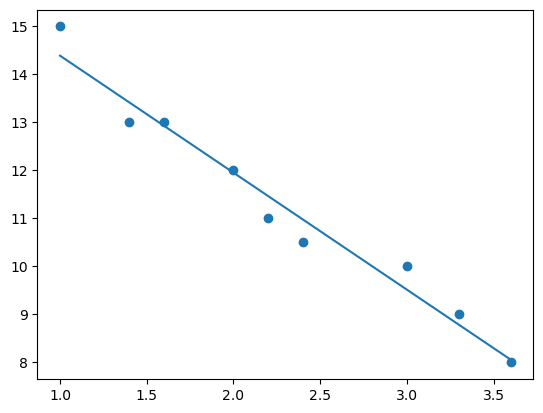

In [3]:
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

* R-squared: 0.967 로 약 96% 설명한다.
* p-value: 1.97e-06 으로 매우 작기 때문에 (0.001이하) 통계적으로 유의미하다.
* x의 회귀계수는 -2.4371이고
* 상수항(y절편)은 16.8291이다.
* 따라서 추정되는 회귀식은 $ y(연비) = -2.4371 * X1 + 16.8291 $

### 단순선형회귀분석에 대한 ANOVA 분산 분석

In [3]:
from statsmodels.formula.api import ols

# X는 자동차 배기량, y는 연비
X = np.array([1, 1.4, 1.6, 2, 2.2, 2.4, 3, 3.3, 3.6])
y = np.array([15, 13, 13, 12, 11, 10.5, 10, 9, 8])

data= pd.DataFrame(dict(X=X, y=y))
model = ols('y ~ X', data=data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

             sum_sq   df           F    PR(>F)
X         37.274792  1.0  203.725066  0.000002
Residual   1.280763  7.0         NaN       NaN


In [17]:
37.274792 / (37.274792+1.280763)

0.9667813626337372

## QQ-polt그리기

In [20]:
# R의 ggplot 이라는 시각화 라이브러리를 Python 에서 쓸 수 있게 해줌
# !pip install plotnine

In [21]:
import scipy.stats as stats
from plotnine import ggplot, aes, stat_qq, stat_qq_line, labs

In [22]:
X

array([1. , 1.4, 1.6, 2. , 2.2, 2.4, 3. , 3.3, 3.6])

In [23]:
y

array([15. , 13. , 13. , 12. , 11. , 10.5, 10. ,  9. ,  8. ])

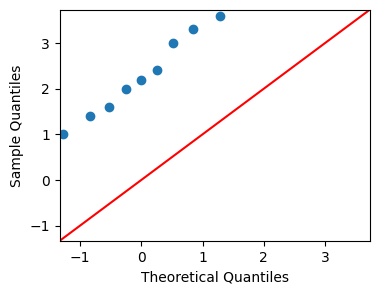

In [25]:
# QQplot 생성
plt.figure(figsize=(4,3))
sm.qqplot(X, line='45', ax=plt.gca(), label='x')
plt.show()

# 다중회귀분석

In [9]:
# 데이터
yard = np.array([31, 31, 27, 39, 30, 32, 28, 23, 28, 35])
area = np.array([58, 51, 47, 35, 48, 42, 43, 56, 41, 41])
park = np.array([1, 1, 5, 5, 2, 4, 5, 1, 1, 3])
dist = np.array([492, 426, 400, 125, 443, 412, 201, 362, 192, 423])
price = np.array([12631, 12084, 12220, 15649, 11486, 12276, 15527, 12666, 13180, 10169])

# 독립 변수와 종속 변수 설정
X = np.column_stack((yard, area, park, dist))
# X = np.column_stack((area, park, dist))
# X = np.column_stack((area, dist))
# X = dist
y = price

# 상수 추가
X = sm.add_constant(X)

# 모델 적합
model = sm.OLS(y, X).fit()

# 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     14.07
Date:                Thu, 29 Aug 2024   Prob (F-statistic):            0.00627
Time:                        10:38:54   Log-Likelihood:                -75.420
No. Observations:                  10   AIC:                             160.8
Df Residuals:                       5   BIC:                             162.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3045.6891   4084.218      0.746      0.4

C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [11]:
# 데이터 생성
yard = np.array([31, 31, 27, 39, 30, 32, 28, 23, 28, 35])
area = np.array([58, 51, 47, 35, 48, 42, 43, 56, 41, 41])
park = np.array([1, 1, 5, 5, 2, 4, 5, 1, 1, 3])
dist = np.array([492, 426, 400, 125, 443, 412, 201, 362, 192, 423])
popul = np.array([4412, 2061, 4407, 1933, 4029, 4180, 3444, 1683, 3020, 4459])
price = np.array([12631, 12084, 12220, 15649, 11486, 12276, 15527, 12666, 13180, 10169])

# 데이터프레임 생성
data = pd.DataFrame({'yard': yard, 'area': area, 'park': park, 'dist': dist, 'popul': popul, 'price': price})

# 독립 변수와 종속 변수 설정
X = data[['yard', 'area', 'park', 'dist', 'popul']]
y = data['price']

# 전진 선택법을 사용한 회귀 분석
model = LinearRegression()
sfs = SequentialFeatureSelector(model, direction='forward', n_features_to_select='auto')
sfs.fit(X, y)

# 선택된 변수
selected_features = X.columns[sfs.get_support()]

# 최종 모델 적합
X_selected = sm.add_constant(data[selected_features])
final_model = sm.OLS(y, X_selected).fit()

# 요약 출력
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.8433
Date:                Thu, 29 Aug 2024   Prob (F-statistic):              0.470
Time:                        11:10:28   Log-Likelihood:                -86.871
No. Observations:                  10   AIC:                             179.7
Df Residuals:                       7   BIC:                             180.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.22e+04   3990.829      3.056      0.0

C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
